# Converting S isotope systematics, and S concentrations
- This notebook shows simple functions for common conversion workflows, e.g., converting from d34 to 34/32S ratios, converting SO3 to S in ppm etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

## Converting between different forms of S isotope notation
- S isotopes are sometimes quoted in terms of $\delta^{32}$S, where the $\frac{32S}{34S}$ ratio of the sample has been referenced to a community standard. 
- In the literature, the most commmonly used standard is the Canyon Diablo Troilite (CDT), with a ratio of 22.220. There is also the Vienna-CDT (VCDT), which was introduced in 1993, which was defined as having a value of -0.3 per mil 

In [2]:
df=pd.read_excel('Sulfur_Conversions.xlsx')
df.head()

,δ34S,δ34S SEE,34S/32S ratio raw measured,34S/32S ratio (1SE) raw measured,34S/32S ratio IMF,SEE_scaled,S_ppm
0,-0.246318,0.467748,0.044336,0.000016,0.044153,0.000021,1000
1,-2.816959,0.921352,0.044222,0.000039,0.044039,0.000041,1100
2,-2.546365,0.767581,0.044234,0.000031,0.044051,0.000034,900
3,-0.584560,0.723941,0.044321,0.000029,0.044138,0.000032,500
4,0.317419,0.450185,0.044361,0.000015,0.044178,0.000020,400


### Lets first convert from delta34S to 32/34

In [10]:
ref_used_test1=ss.calculate_std_ratio_used(d34S=df['δ34S'], 
                        S3432=df['34S/32S ratio IMF'])
ref_used_test1

0    0.044164
1    0.044164
2    0.044164
3    0.044164
4    0.044164
5    0.044164
6    0.044164
7    0.044164
dtype: float64

In [12]:
ref_used_test2=ss.calculate_std_ratio_used(d34S=df['δ34S'], 
                        S3432=df['34S/32S ratio raw measured'])
ref_used_test2


0    0.044347
1    0.044347
2    0.044347
3    0.044347
4    0.044347
5    0.044347
6    0.044347
7    0.044347
dtype: float64

In [23]:
1/22.6436

0.04416258898761681

In [27]:
d342=ss.convert_3432S_to_d34(S3432=df['34S/32S ratio IMF'],
                           st_ratio=0.04416)
d342

0   -0.161421
1   -2.732279
2   -2.461663
3   -0.499692
4    0.402364
5   -0.432037
6   -1.086028
7   -0.026112
Name: 34S/32S ratio IMF, dtype: float64

In [28]:
d34=ss.convert_3432S_to_d34(S3432=df['34S/32S ratio IMF'],
                           st_ratio=0.044164)
d34

0   -0.251978
1   -2.822604
2   -2.552011
3   -0.590218
4    0.311756
5   -0.522570
6   -1.176501
7   -0.116681
Name: 34S/32S ratio IMF, dtype: float64

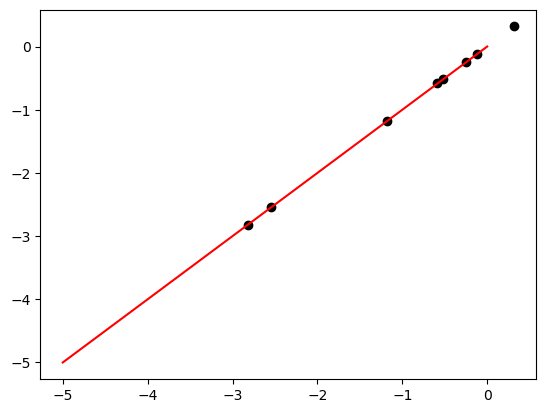

In [25]:
plt.plot(d34, df['δ34S'], 'ok')
plt.plot([-5, 0], [-5, 0], '-r')

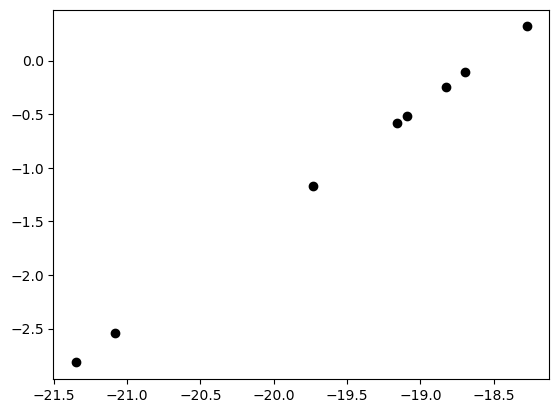